In [942]:
import sys
sys.path.append("/media/data/anaconda3/envs/upgrad/lib/python3.8/site-packages/")

## Notebook structure

- Summary statistics
- Data Cleaning
    - remove duplicates rows
    - remove columns where all values are same
    - remove irrelevant columns : mobile_number, date_columns
- Data preprocessing
    - Missing value handling
    - Filtering high value customers
    - Derive target variable : churn
- EDA
    - Univariate analysis
    - Bivarriate analysis
    - Correlations and Intution from EDA
- Derive new features
- Delete columns of ninth month
- Outlier treatment
- Correlation table
- Preparing data for Modelling
    - split into train and test set
    - handle class imbalance using stratify
    - scale data
    - Use PCA for dimensionality reduction
- Modelling    
    - Create Logistic Regression and predict on test set
    - Create Random Forests and predict on test set
        - Use HPT to get best parameters
    - Choose best model based on AUC score
- Feature importances


In [943]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [944]:
df = pd.read_csv("telecom_churn_data.csv")
original_df = df.copy()

### Summary statistics

In [945]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [946]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [947]:
df.shape

(99999, 226)

### Data cleaning

#### 1. Drop duplicate rows
    - no such rows

In [948]:
df[df.duplicated()]

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g


#### 2. Drop columns where all values are same
There are 16 columns with all value as same

In [949]:
same_cols = df.columns[df.nunique() <= 1]

In [950]:
print("There are {} columns with all value as same. Columns = {}".format(len(same_cols), list(same_cols)))

There are 16 columns with all value as same. Columns = ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [951]:
df= df.drop(columns=same_cols)

#### 3. Drop irrelevant columns

In [952]:
# mobile number
df= df.drop(columns=['mobile_number'])

# date columns
date_cols  = [col for col in missing_value_df.index if "date" in col.lower()]
df = df.drop(columns=date_cols)

### Missing value handling

In [953]:
missing_value_df = round(df.isnull().sum() / len(df)  * 100,2)
missing_value_df[missing_value_df > 50].sort_values(ascending=False)

date_of_last_rech_data_6    74.85
total_rech_data_6           74.85
count_rech_2g_6             74.85
av_rech_amt_data_6          74.85
arpu_3g_6                   74.85
max_rech_data_6             74.85
arpu_2g_6                   74.85
count_rech_3g_6             74.85
night_pck_user_6            74.85
fb_user_6                   74.85
total_rech_data_7           74.43
arpu_2g_7                   74.43
night_pck_user_7            74.43
arpu_3g_7                   74.43
date_of_last_rech_data_7    74.43
max_rech_data_7             74.43
av_rech_amt_data_7          74.43
fb_user_7                   74.43
count_rech_2g_7             74.43
count_rech_3g_7             74.43
count_rech_2g_9             74.08
date_of_last_rech_data_9    74.08
max_rech_data_9             74.08
total_rech_data_9           74.08
fb_user_9                   74.08
av_rech_amt_data_9          74.08
arpu_3g_9                   74.08
arpu_2g_9                   74.08
night_pck_user_9            74.08
count_rech_3g_

#### 1. Impute missing values in recharge columns with 0 as it means people haven't recharge

In [954]:
rech_cols = [col for col in missing_value_df.index if 'rech' in col.lower()
             and "date" not in col.lower()]

In [955]:
df[rech_cols] = df[rech_cols].apply(lambda x: x.fillna(0))

### 2. Handling columns starting with 'fb', 'night', 'arpu'

**null in fb_user coulumns can be replaced with 0 as it seems fb pack means wasn't recharged**

In [958]:
df.fb_user_6.value_counts()

1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64

In [959]:
fb_user_cols = [col for col in df.columns if 'fb_user' in col]
fb_user_cols

['fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']

In [960]:
df[fb_user_cols] = df[fb_user_cols].apply(lambda x: x.fillna(0))

**null in night_pck columns can be replaced with 0 as fb pack means wasn't recharged**

In [961]:
df.night_pck_user_6.value_counts()

0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64

In [962]:
night_pck_cols = [col for col in df.columns if 'night_pck' in col]
df[night_pck_cols] = df[night_pck_cols].apply(lambda x: x.fillna(0))

**null in arpu columns can be replaced with 0 as average revenue per user was 0**

In [963]:
df[['count_rech_3g_6', 'arpu_3g_6', 'monthly_3g_6', 'sachet_3g_6']][df.arpu_3g_6.isnull()][:5]

,count_rech_3g_6,arpu_3g_6,monthly_3g_6,sachet_3g_6
1,0.0,NaN,0,0
2,0.0,NaN,0,0
3,0.0,NaN,0,0
5,0.0,NaN,0,0
6,0.0,NaN,0,0


In [964]:
arpu_cols = [col for col in df.columns if 'arpu' in col]
df[arpu_cols] = df[arpu_cols].apply(lambda x: x.fillna(0))

### 4. Imputing remaining columns
Replacing the arpu, onnet_mou, loc_, std_, recharge, mou, sachet columns as 0, as it means
reacharge was not done or calls were not made

In [965]:
missing_val_columns = [col for col in list(missing_value_df.index) if col not in date_cols]
df[missing_val_columns] = df[missing_val_columns].apply(lambda x: x.fillna(0))

In [966]:
missing_value_df = round(df.isnull().sum() / len(df)  * 100,2)
missing_value_df[missing_value_df > 0].sort_values(ascending=False)

Series([], dtype: float64)

### Filter high value customers
- calculate total recharge amount (call + data) of month 6 and 7 (good phase)
- calculate average recharge done
- retain only those customers who have recharged their mobiles >= 70th percentile of the above avg. recharge

In [967]:
# 1. calculate total recharge amount for 6th and 7th month

df['total_rech_data_amt_6'] = df['total_rech_amt_6'] + df['total_rech_data_6'] * \
                              df['av_rech_amt_data_6']
df['total_rech_data_amt_7'] = df['total_rech_amt_7'] + df['total_rech_data_7'] * \
                              df['av_rech_amt_data_7']

# avg. recharge for 6th and 7th month
df['avg_rech_data_amt_6_7'] = (df['total_rech_data_amt_6'] + df['total_rech_data_amt_7']) \
                               / 2


In [968]:
df[['total_rech_amt_6', 'total_rech_data_6', 'av_rech_amt_data_6','total_rech_amt_7', 'total_rech_data_7', 'av_rech_amt_data_7', 'avg_rech_data_amt_6_7']][df.total_rech_data_6 > 0][:3]

,total_rech_amt_6,total_rech_data_6,av_rech_amt_data_6,total_rech_amt_7,total_rech_data_7,av_rech_amt_data_7,avg_rech_data_amt_6_7
0,362,1.0,252.0,252,1.0,252.0,559.0
4,196,1.0,56.0,350,0.0,0.0,301.0
19,154,1.0,154.0,294,1.0,154.0,378.0


In [969]:
seventieth_quantile = df['avg_rech_data_amt_6_7'].quantile(0.7)
seventieth_quantile

478.0

In [970]:
high_value_cust_df = df.loc[(df['avg_rech_data_amt_6_7'] >= seventieth_quantile)]

In [971]:
"Number of high value customers : {}".format(len(high_value_cust_df))

'Number of high value customers : 30001'

### Derive target variable : churn
If a user has not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.
The attributes to use to tag churners are: total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9


In [972]:
high_value_cust_df[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00
8,34.91,142.18,0.00,0.00
21,252.61,1031.53,0.00,0.00
23,127.48,127.63,13.93,314.74


In [973]:
high_value_cust_df['churn'] = high_value_cust_df[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].sum(axis = 1) == 0

In [974]:
high_value_cust_df[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'churn']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churn
0,0.00,0.00,0.00,0.00,True
7,0.00,0.00,0.00,0.00,True
8,34.91,142.18,0.00,0.00,False
21,252.61,1031.53,0.00,0.00,False
23,127.48,127.63,13.93,314.74,False


In [975]:
high_value_cust_df.churn = high_value_cust_df.churn.astype(int)

In [976]:
high_value_cust_df.churn.value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [977]:
(high_value_cust_df.churn.value_counts() / len(high_value_cust_df) * 100).sort_values(ascending=False)

0    91.863605
1     8.136395
Name: churn, dtype: float64

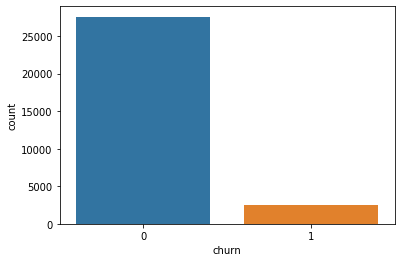

In [978]:
sns.countplot(x='churn', data=high_value_cust_df)

**We have around 8% churned users and 91% not churned users for high value customers. The dataset is imbalanced.**

In [979]:
## Drop the 9th month columns
high_value_cust_df = high_value_cust_df.drop(columns=['total_ic_mou_9', 'total_og_mou_9',
                                                      'vol_2g_mb_9', 'vol_3g_mb_9'])

## EDA

In [980]:
"Number of columns : {}".format(len(df.columns))

'Number of columns : 204'

**Many columns have suffix based on the months _6 _7, _8, _9, let's remove them and see the list of columns**

In [981]:
cols = set()
for col in high_value_cust_df.columns:
    cols.add(re.split('_6|_7|_8|_9|_2g|_3g' ,col)[0])

In [982]:
# converting to array helps in seeing the a longer list without scrolling
np.array(sorted(list(cols)))

array(['aon', 'arpu', 'aug_vbc', 'av_rech_amt_data', 'avg_rech_data_amt',
       'churn', 'count_rech', 'fb_user', 'ic_others', 'isd_ic_mou',
       'isd_og_mou', 'jul_vbc', 'jun_vbc', 'last_day_rch_amt',
       'loc_ic_mou', 'loc_ic_t2f_mou', 'loc_ic_t2m_mou', 'loc_ic_t2t_mou',
       'loc_og_mou', 'loc_og_t2c_mou', 'loc_og_t2f_mou', 'loc_og_t2m_mou',
       'loc_og_t2t_mou', 'max_rech_amt', 'max_rech_data', 'monthly',
       'night_pck_user', 'offnet_mou', 'og_others', 'onnet_mou',
       'roam_ic_mou', 'roam_og_mou', 'sachet', 'sep_vbc', 'spl_ic_mou',
       'spl_og_mou', 'std_ic_mou', 'std_ic_t2f_mou', 'std_ic_t2m_mou',
       'std_ic_t2t_mou', 'std_og_mou', 'std_og_t2f_mou', 'std_og_t2m_mou',
       'std_og_t2t_mou', 'total_ic_mou', 'total_og_mou', 'total_rech_amt',
       'total_rech_data', 'total_rech_data_amt', 'total_rech_num', 'vol'],
      dtype='<U19')

In [983]:
# Create utility methods for EDA

def uni(col):
    '''
    creates plot for univariate analysis
        distplot for numerical
        countplot for categorical
    '''
    if 'int' in str(col.dtype) or 'float' in str(col.dtype):
        sns.distplot(col, kde=False)
    elif 'int' in str(col.dtype):
        sns.countplot(col)
    else:
        raise Exception("Unhandled datatype : {}".format(col.dtype))
        
def get_col(df, col_str):
    '''
    returns column names of df having the stringcol_str
    '''
    return np.array([col for col in df.columns if col_str in col])
        

### Univariate analysis

**1. aon**

Most of the users in the network are less than 1000 - 1500 days, i.e 3 -4 years

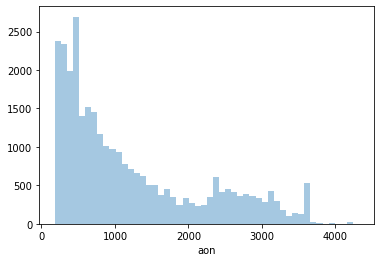

In [984]:
uni(high_value_cust_df.aon)

**2. arpu**

ARPU data is right skewed, this shows presence of outliers. ARPU for 6,7,8,9 months lie between 175 - 200


In [985]:
get_col(high_value_cust_df, 'arpu')

array(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9'], dtype='<U9')

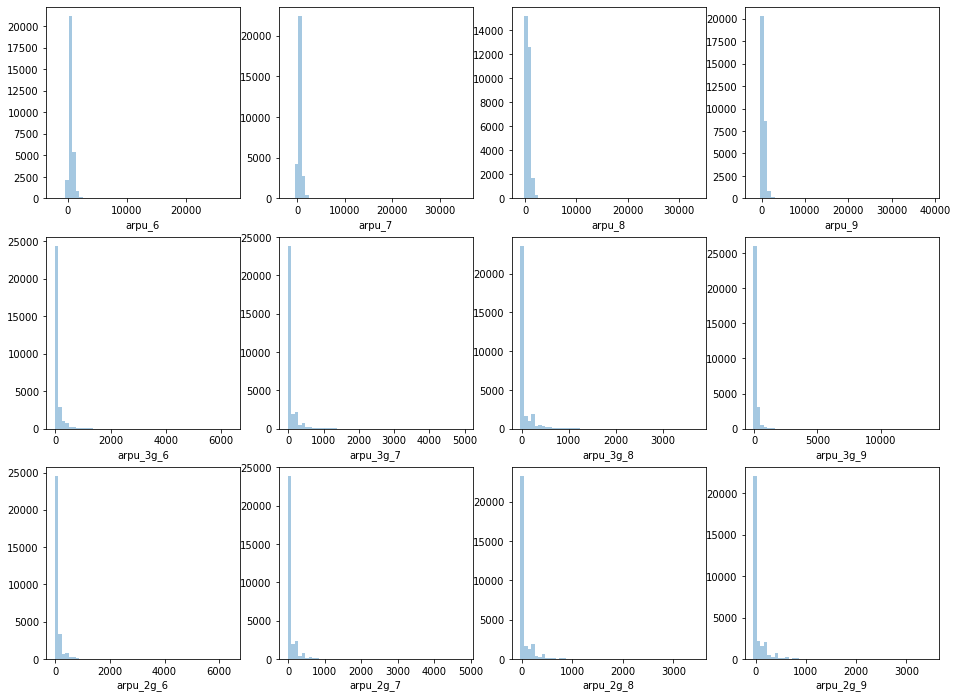

In [986]:
plt.figure(figsize=(16, 12))
arpu_cols = list(get_col(high_value_cust_df, 'arpu'))
for col in arpu_cols:
    plt.subplot(3,4, arpu_cols.index(col) + 1)
    uni(high_value_cust_df[col])

In [987]:
df[list(get_col(high_value_cust_df, 'arpu'))].describe()

,arpu_6,arpu_7,arpu_8,arpu_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,282.987358,278.536648,279.154731,261.645069,22.526009,22.856642,24.014520,25.990724,21.731907,21.969404,22.809665,24.292274
std,328.439770,338.156291,344.474791,341.998630,104.360309,106.457258,104.593649,118.562650,94.408718,96.746052,94.396902,96.437504
min,-2258.709000,-2014.045000,-945.808000,-1899.505000,-30.820000,-26.040000,-24.490000,-71.090000,-35.830000,-15.480000,-55.830000,-45.740000
25%,93.411500,86.980500,84.126000,62.685000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,197.704000,191.640000,192.080000,176.849000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,371.060000,365.344500,369.370500,353.466500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,27731.088000,35145.834000,33543.624000,38805.617000,6362.280000,4980.900000,3716.900000,13884.310000,6433.760000,4809.360000,3483.170000,3467.170000


**3. fb_user**

Recharge of facebook packs got reduced in months 8 and 9

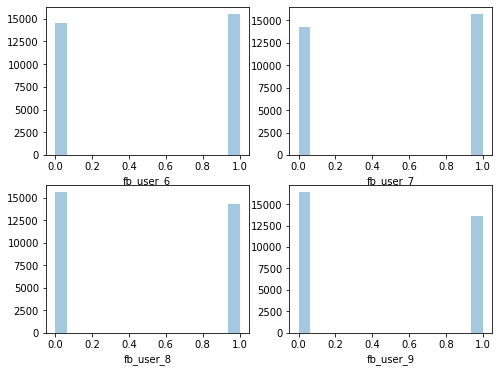

In [988]:
plt.figure(figsize=(8, 6))
uni_cols = list(get_col(high_value_cust_df, 'fb_user'))
for col in uni_cols:
    plt.subplot(2,2, uni_cols.index(col) + 1)
    uni(high_value_cust_df[col])

**4. onnet_mou and offnet_mou**

- Data right skewed, this indicates presence of outliers in the right.
- median of onnet mou ranges from 65 to 90, and has a decreasing trend from month 6 to 9
- median of onnet mou ranges from 175 to 230, and has a decreasing trend from month 6 to 9
- shows offnet mou is more than onnet

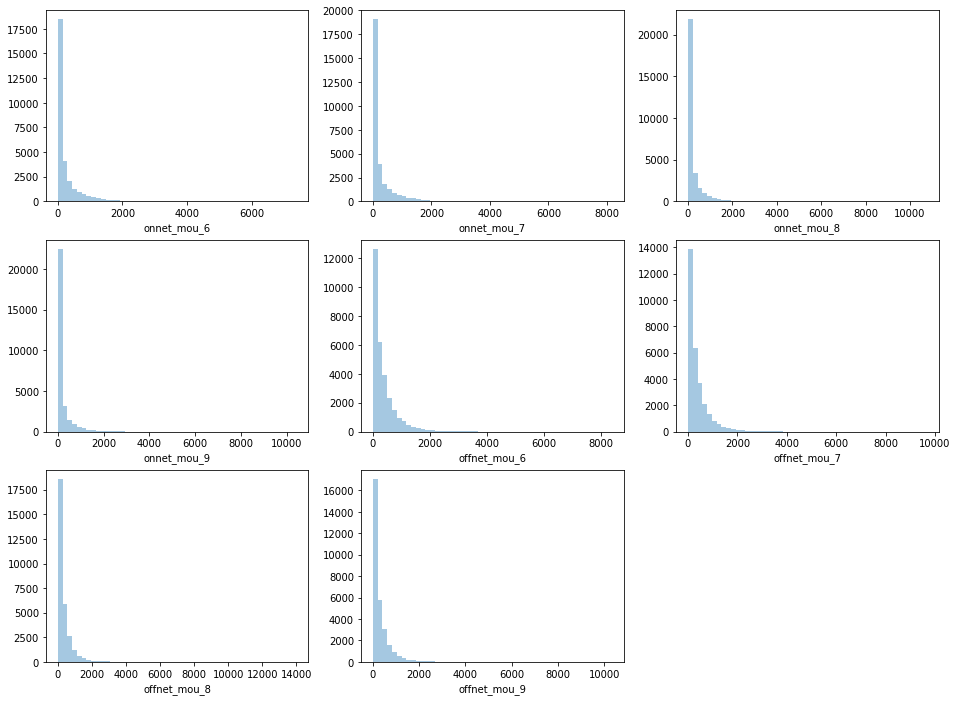

In [989]:
plt.figure(figsize=(16, 12))
uni_cols = list(get_col(high_value_cust_df, 'net'))
for col in uni_cols:
    plt.subplot(3,3, uni_cols.index(col) + 1)
    uni(high_value_cust_df[col])

In [990]:
high_value_cust_df[list(get_col(high_value_cust_df, 'net'))].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,260.793024,267.819295,234.112539,211.487618,373.693961,378.103169,335.077044,303.233503
std,459.644368,479.993989,458.448598,436.278204,482.523558,498.923555,482.062509,447.924597
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.080000,16.030000,10.390000,6.230000,71.610000,69.910000,46.740000,31.660000
50%,84.580000,82.810000,65.610000,54.310000,222.540000,220.030000,182.790000,155.630000
75%,290.440000,290.240000,239.960000,209.040000,487.940000,494.010000,438.890000,396.810000
max,7376.710000,8157.780000,10752.560000,10427.460000,8362.360000,9667.130000,14007.340000,10310.760000


**5. avg recharge amount columns**
- median of avg recharge amount ranges from 17 to 69
- average data recharge decreases from month 6 to 9

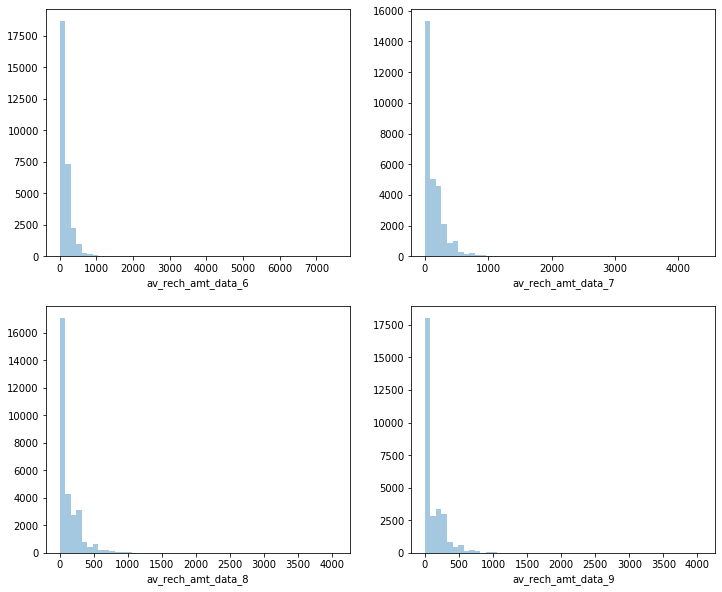

In [991]:
plt.figure(figsize=(12, 10))
uni_cols = list(get_col(high_value_cust_df, 'av_rech_amt_data'))
for col in uni_cols:
    plt.subplot(2,2, uni_cols.index(col) + 1)
    uni(high_value_cust_df[col])

In [992]:
high_value_cust_df[list(get_col(high_value_cust_df, 'av_rech_amt_data'))].describe()

,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,30001.000000,30001.000000,30001.000000,30001.000000
mean,130.654329,139.781778,122.132258,115.527913
std,200.328052,206.808748,195.586944,190.789105
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,50.000000,69.000000,25.000000,17.000000
75%,198.000000,210.000000,196.000000,179.000000
max,7546.000000,4365.000000,4061.000000,4061.000000


### Derive new features

- There is a gap between the usage of (6, 7) month and 8th month which is associated with churn
- This gap can be quantified using the difference of avg(6,7) and 8th month

In [993]:
get_col(high_value_cust_df, '_6')

array(['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
       'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6',
       'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6',
       'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6',
       'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6',
       'last_day_rch_amt_6', 'total_rech_data_6', 'max_rech_data_6',
       'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6',
       'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_3g_6', 'arpu_2g_6',
       'night_pck_user_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6',
       'sachet_3g_6', 'fb_user_6', 'total_rech_data_amt_6',
       'av

In [994]:
# find columns where the gap can be calulated

diff_cols = []
for col in get_col(high_value_cust_df, '_6'):
    base_col_name = col.split("_6")[0]
    seventh_month_col_name = base_col_name + "_7"
    eight_month_col_name = base_col_name + "_8" 
    
    if seventh_month_col_name in high_value_cust_df.columns and \
       eight_month_col_name in high_value_cust_df.columns:
        sixth_month = high_value_cust_df[col]
        seventh_month = high_value_cust_df[seventh_month_col_name]
        eight_month = high_value_cust_df[eight_month_col_name]
        
        diff_col_name = base_col_name + "_diff"
        high_value_cust_df[diff_col_name] = (sixth_month + seventh_month) / 2 - eight_month
        diff_cols.append(diff_col_name)

In [995]:
np.array(diff_cols)

array(['arpu_diff', 'onnet_mou_diff', 'offnet_mou_diff',
       'roam_ic_mou_diff', 'roam_og_mou_diff', 'loc_og_t2t_mou_diff',
       'loc_og_t2m_mou_diff', 'loc_og_t2f_mou_diff',
       'loc_og_t2c_mou_diff', 'loc_og_mou_diff', 'std_og_t2t_mou_diff',
       'std_og_t2m_mou_diff', 'std_og_t2f_mou_diff', 'std_og_mou_diff',
       'isd_og_mou_diff', 'spl_og_mou_diff', 'og_others_diff',
       'total_og_mou_diff', 'loc_ic_t2t_mou_diff', 'loc_ic_t2m_mou_diff',
       'loc_ic_t2f_mou_diff', 'loc_ic_mou_diff', 'std_ic_t2t_mou_diff',
       'std_ic_t2m_mou_diff', 'std_ic_t2f_mou_diff', 'std_ic_mou_diff',
       'total_ic_mou_diff', 'spl_ic_mou_diff', 'isd_ic_mou_diff',
       'ic_others_diff', 'total_rech_num_diff', 'total_rech_amt_diff',
       'max_rech_amt_diff', 'last_day_rch_amt_diff',
       'total_rech_data_diff', 'max_rech_data_diff', 'count_rech_2g_diff',
       'count_rech_3g_diff', 'av_rech_amt_data_diff', 'vol_2g_mb_diff',
       'vol_3g_mb_diff', 'arpu_3g_diff', 'arpu_2g_diff',
 

In [996]:
# let's verify the diffs for arpu
high_value_cust_df[['arpu_6','arpu_7','arpu_8','arpu_diff']][:5]

,arpu_6,arpu_7,arpu_8,arpu_diff
0,197.385,214.816,213.803,-7.7025
7,1069.180,1349.850,3171.480,-1961.9650
8,378.721,492.223,137.362,298.1100
21,514.453,597.753,637.760,-81.6570
23,74.350,193.897,366.966,-232.8425


**Delete columns of ninth month**

In [997]:
high_value_cust_df = high_value_cust_df.drop(columns=get_col(high_value_cust_df, '_9'))

In [998]:
len(high_value_cust_df.columns)

205

### Outlier treatment
- Find IQR (percentile75 - percentile25)
- Upper fence = percentile75 + 1.5 * iqr
- Lower fence = percentile25 - 1.5 * iqr
- Cap values below and above the fences

In [999]:
capped_df = high_value_cust_df.copy()
for col in capped_df.columns:
    if col == 'churn' :
        continue
    percentile25 = high_value_cust_df[col].quantile(0.25)
    percentile75 = high_value_cust_df[col].quantile(0.75)

    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    
    capped_df[col][capped_df[col] <= lower_limit] = lower_limit
    capped_df[col][capped_df[col] >= upper_limit] = upper_limit

### Bivariate Analysis

**1. churn vs aon**
- aon was lower for customers who churned than those who didn't

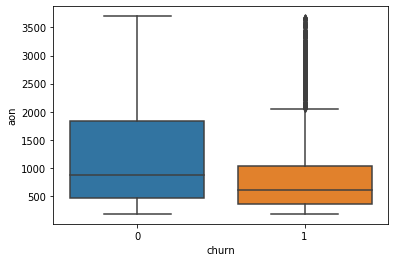

In [1000]:
sns.boxplot(data=capped_df, x='churn', y='aon')

**2. churn vs arpu columns**
- the diff column shows arpu gap increased significanly in the 8th month for customer who churned

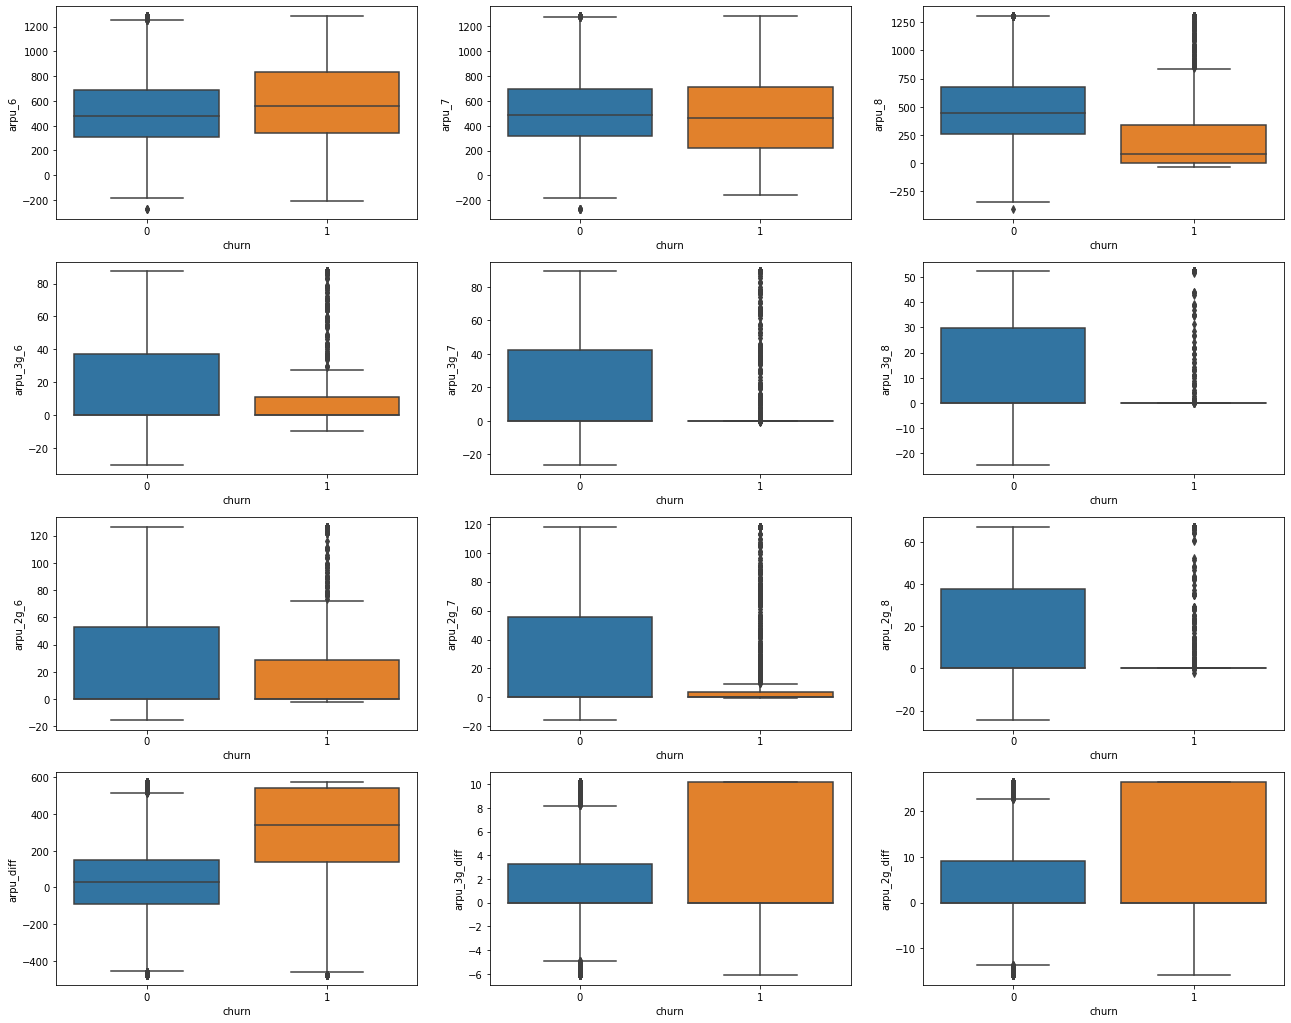

In [1001]:
plt.figure(figsize=(22, 18))
cols = list(get_col(capped_df, 'arpu'))
for col in cols:
    plt.subplot(4,3, cols.index(col) + 1)
    sns.boxplot(data=capped_df, x='churn', y=col)

**3. churn vs fb_user columns**
- in the 8th month, it can be seen that customers who churned almost stopped recharging facebook packs

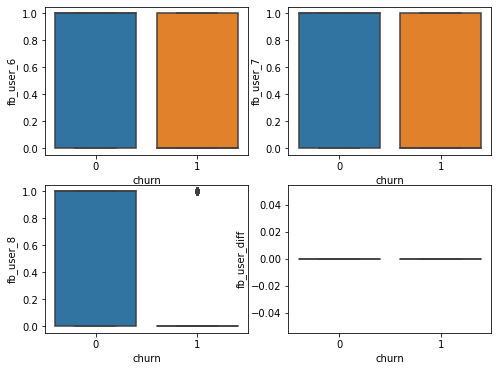

In [1002]:
plt.figure(figsize=(8, 6))
cols = list(get_col(capped_df, 'fb_user'))
for col in cols:
    plt.subplot(2,2, cols.index(col) + 1)
    sns.boxplot(data=capped_df, x='churn', y=col)

**4. churn vs onnet_mou and offnet_mou**
- the diff column shows onnet_mou and offnet_mou gap increased significanly in the 8th month for customer who churned

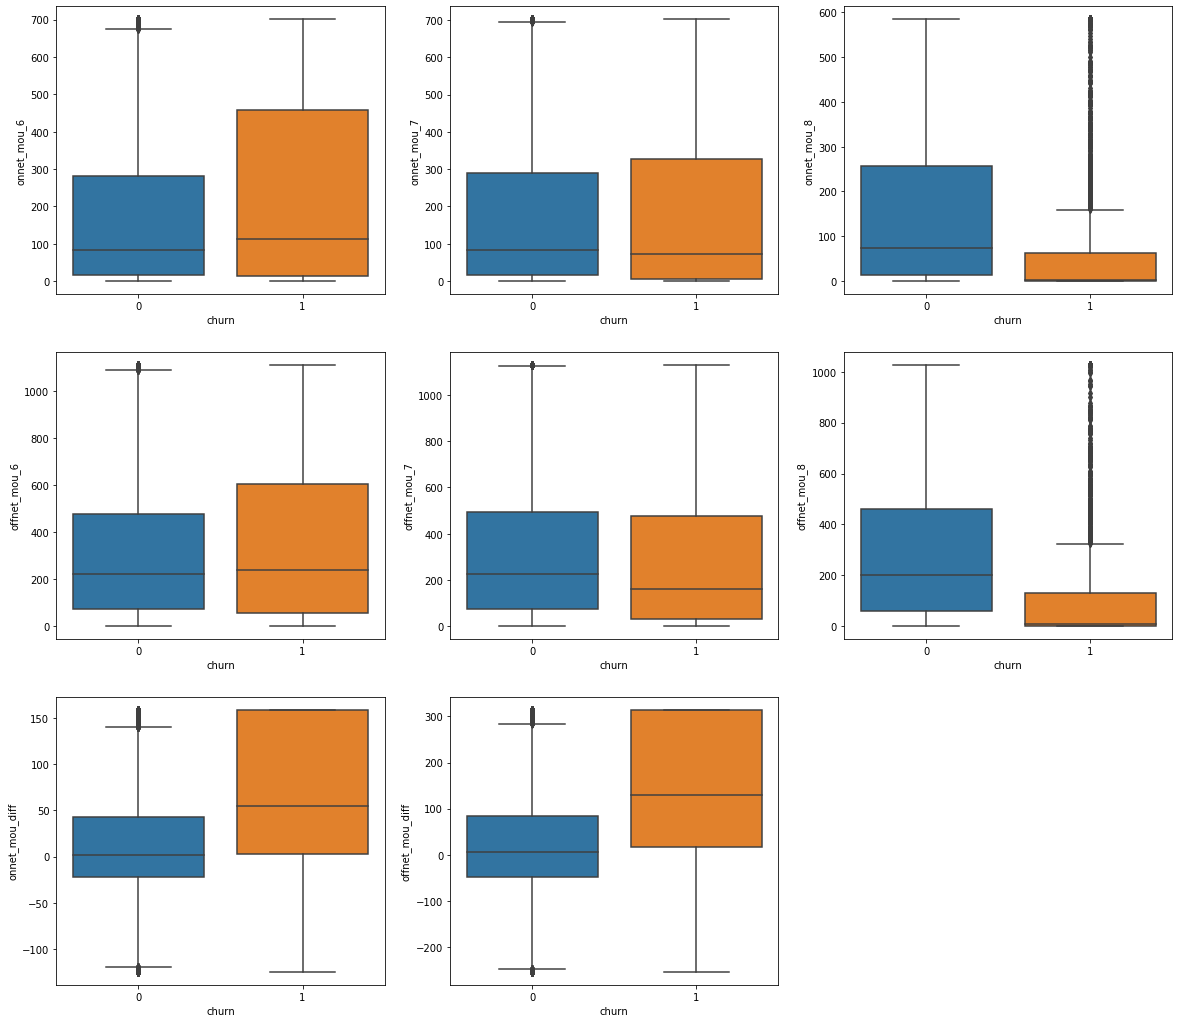

In [1003]:
plt.figure(figsize=(20, 18))
cols = list(get_col(capped_df, 'net'))
for col in cols:
    plt.subplot(3,3, cols.index(col) + 1)
    sns.boxplot(data=capped_df, x='churn', y=col)

In [1004]:
get_col(capped_df, 'net')

array(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'onnet_mou_diff',
       'offnet_mou_diff'], dtype='<U15')

**5. av_rech_amt_data columns**
- It can be be observed that for the customers who churned had very low recharges in the 8th month as compared to 6th and 7th months

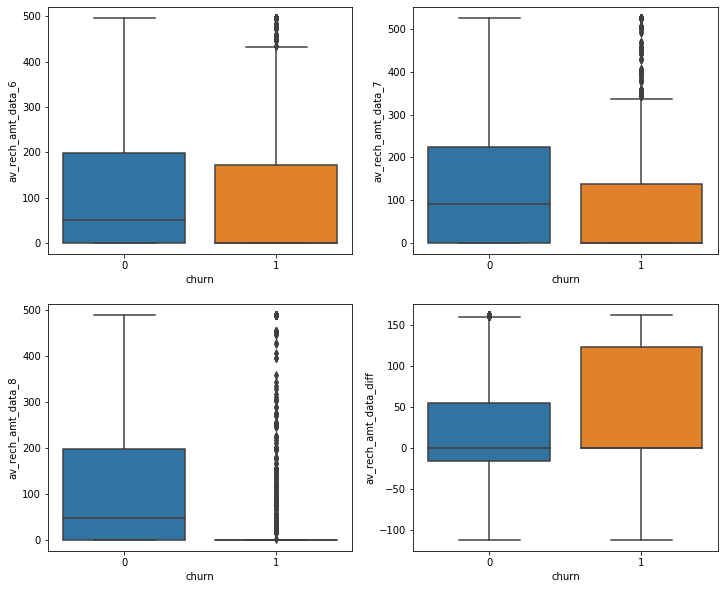

In [1005]:
plt.figure(figsize=(12, 10))
cols = list(get_col(capped_df, 'av_rech_amt_data'))

for col in cols:
    plt.subplot(2,2, cols.index(col) + 1)
    sns.boxplot(data=capped_df, x='churn', y=col)

**Correlations**
- due to presence of lots of columns multi-collinearity is likely
- we also some high co-relations in the table below

In [1006]:
capped_df.corr()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,vol_2g_mb_diff,vol_3g_mb_diff,arpu_3g_diff,arpu_2g_diff,night_pck_user_diff,monthly_2g_diff,sachet_2g_diff,monthly_3g_diff,sachet_3g_diff,fb_user_diff
arpu_6,1.000000,0.567207,0.485620,0.449057,0.306332,0.279128,0.614271,0.411436,0.368340,NaN,...,-0.060405,-0.017600,-0.009655,-0.003146,NaN,NaN,NaN,NaN,NaN,NaN
arpu_7,0.567207,1.000000,0.684653,0.312430,0.448162,0.399181,0.417704,0.600338,0.508333,NaN,...,-0.101460,-0.063201,-0.044159,-0.041558,NaN,NaN,NaN,NaN,NaN,NaN
arpu_8,0.485620,0.684653,1.000000,0.237287,0.328111,0.495074,0.335705,0.458384,0.655140,NaN,...,-0.163987,-0.161158,-0.185060,-0.190899,NaN,NaN,NaN,NaN,NaN,NaN
onnet_mou_6,0.449057,0.312430,0.237287,1.000000,0.820960,0.710144,0.184076,0.123451,0.120033,NaN,...,-0.100314,-0.092402,-0.099054,-0.097470,NaN,NaN,NaN,NaN,NaN,NaN
onnet_mou_7,0.306332,0.448162,0.328111,0.820960,1.000000,0.828023,0.120627,0.184941,0.172095,NaN,...,-0.111492,-0.102137,-0.106878,-0.105351,NaN,NaN,NaN,NaN,NaN,NaN
onnet_mou_8,0.279128,0.399181,0.495074,0.710144,0.828023,1.000000,0.133918,0.195477,0.289223,NaN,...,-0.116542,-0.098723,-0.105538,-0.108635,NaN,NaN,NaN,NaN,NaN,NaN
offnet_mou_6,0.614271,0.417704,0.335705,0.184076,0.120627,0.133918,1.000000,0.770714,0.648742,NaN,...,-0.108456,-0.092187,-0.104981,-0.101543,NaN,NaN,NaN,NaN,NaN,NaN
offnet_mou_7,0.411436,0.600338,0.458384,0.123451,0.184941,0.195477,0.770714,1.000000,0.800056,NaN,...,-0.119469,-0.103373,-0.116617,-0.112096,NaN,NaN,NaN,NaN,NaN,NaN
offnet_mou_8,0.368340,0.508333,0.655140,0.120033,0.172095,0.289223,0.648742,0.800056,1.000000,NaN,...,-0.118591,-0.102401,-0.115247,-0.113751,NaN,NaN,NaN,NaN,NaN,NaN
roam_ic_mou_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Modelling

In [1007]:
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from sklearn import metrics

#### Splitting into train and test set and handling imbalance dataset

In [1008]:
## train-test split
X = capped_df.copy()
y = X.pop("churn")

#Splitting into Train and Test dataset in 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=100, stratify=y)
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (24000, 204)
Shape of X Test:  (6001, 204)
Shape of y Train:  (24000,)
Shape of y Test:  (6001,)


### 1. PCA 
- for dimensionality reduction
- check variance to get the right number of pca components

In [1009]:
scaler = StandardScaler()
x = scaler.fit_transform(X_train)

In [1010]:
x[:3,:3]

array([[-1.07071803, -1.39605584, -0.77685951],
       [ 0.81245908,  0.70630921,  0.80684036],
       [-0.3896531 , -0.2711068 , -0.31637673]])

In [1011]:
pca = PCA(random_state=42)
pca.fit(x)

PCA(random_state=42)

In [1012]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

**Make a scree plot**

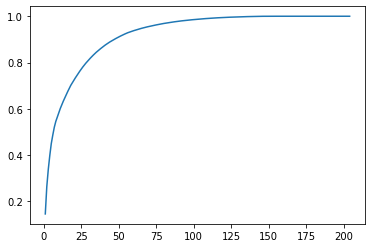

In [1013]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [1056]:
var_cumu[67]

0.9525425075732229

**Selecting 68 features gives above 95 % variance**

In [1015]:
pc2 = PCA(n_components=68, random_state=42)

In [1016]:
df_train_pca = pc2.fit_transform(X_train)

In [1017]:
df_train_pca.shape

(24000, 68)

In [1018]:
corrmat = np.corrcoef(df_train_pca.transpose())

**black colour in heat shows pca components are not un co-related**

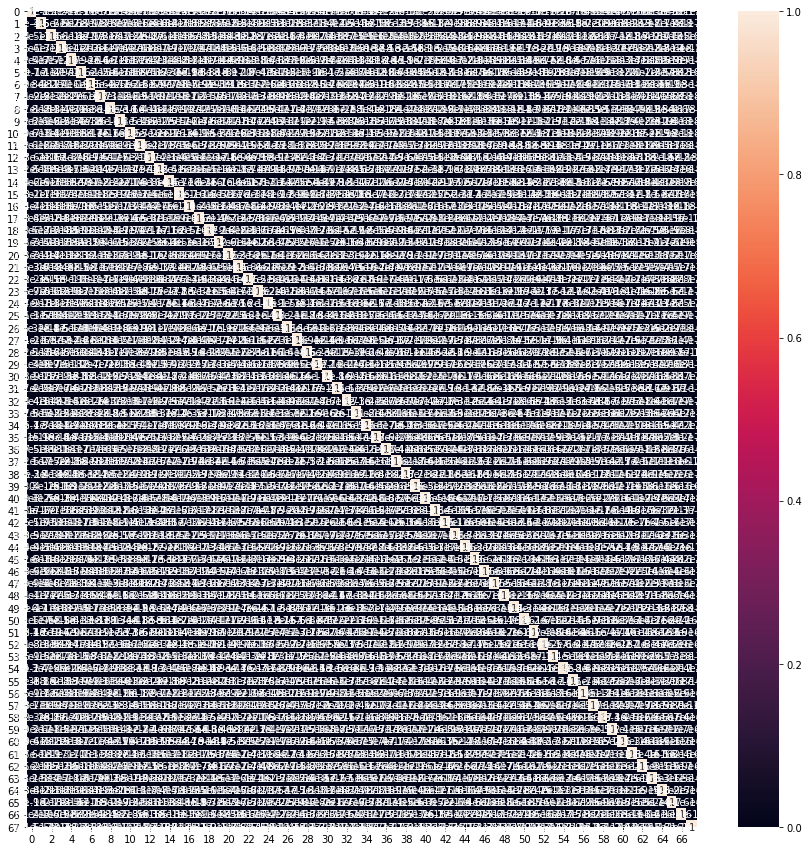

In [1019]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [1020]:
# Applying the transformation on the test set
df_test_pca = pc2.transform(X_test)
df_test_pca.shape

(6001, 68)

### 2. Train a logistic regression model

In [1021]:
lr_pca = LogisticRegression()
model_pca = lr_pca.fit(df_train_pca, y_train)

In [1022]:
pred_probs_test = model_pca.predict_proba(df_test_pca)
"AUC : {:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'AUC : 0.76'

### 3. Train a random forest model

In [1023]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [1024]:
params = {
    'max_depth': [10,20,40, 50],
    'min_samples_leaf': [15,20,50,100,150],
    'n_estimators': [100, 125, 150]
}
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 4)

In [1025]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = folds,
                           n_jobs=3, verbose=1, scoring="roc_auc")

In [1026]:
%%time
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 60 candidates, totalling 240 fits
CPU times: user 54.4 s, sys: 380 ms, total: 54.8 s
Wall time: 14min


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=3,
             param_grid={'max_depth': [10, 20, 40, 50],
                         'min_samples_leaf': [15, 20, 50, 100, 150],
                         'n_estimators': [100, 125, 150]},
             scoring='roc_auc', verbose=1)

In [1027]:
grid_search.best_score_

0.8804857097897941

In [1028]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=20, n_estimators=150,
                       n_jobs=-1, random_state=42)

In [1029]:
pred_probs_test = rf_best.predict_proba(df_test_pca)
"AUC : {:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'AUC : 0.88'

**Random forest with max_depth=20, min_samples_leaf=20, n_estimators=150 gave the best AUC score of 0.88**

## Feature importances
- We will train Random Forests on the train data without doing PCA and get the feature importances

In [1042]:
rf_2 = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [10,20,40, 50],
    'min_samples_leaf': [15,20,50,100,150],
    'n_estimators': [100, 125, 150]
}
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 4)

In [1043]:
grid_search_2 = GridSearchCV(estimator=rf_2,
                           param_grid=params,
                           cv = folds,
                           n_jobs=3, verbose=1, scoring="roc_auc")

In [1044]:
%%time
grid_search_2.fit(X_train, y_train)

Fitting 4 folds for each of 60 candidates, totalling 240 fits
CPU times: user 25.5 s, sys: 310 ms, total: 25.8 s
Wall time: 8min 44s


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=3,
             param_grid={'max_depth': [10, 20, 40, 50],
                         'min_samples_leaf': [15, 20, 50, 100, 150],
                         'n_estimators': [100, 125, 150]},
             scoring='roc_auc', verbose=1)

In [1045]:
grid_search_2.best_score_

0.9167548524717107

In [1046]:
rf_best_interpret = grid_search_2.best_estimator_
rf_best_interpret

RandomForestClassifier(max_depth=10, min_samples_leaf=15, n_estimators=150,
                       n_jobs=-1, random_state=42)

In [1047]:
pred_probs_test = rf_best_interpret.predict_proba(X_test)
"AUC : {:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'AUC : 0.92'

In [1049]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best_interpret.feature_importances_
})

In [1054]:
imp_df.sort_values(by="Imp", ascending=False)[:15]

,Varname,Imp
80,total_ic_mou_8,0.080064
65,loc_ic_mou_8,0.079496
59,loc_ic_t2m_mou_8,0.052506
95,total_rech_amt_8,0.041793
2,arpu_8,0.039471
29,loc_og_mou_8,0.038573
53,total_og_mou_8,0.036852
98,max_rech_amt_8,0.035318
20,loc_og_t2m_mou_8,0.028922
56,loc_ic_t2t_mou_8,0.026852


### Observations
- Reduction in number and duration incoming calls, outgoing calls (local, std, same network, other network) is a strong indicator of churn
- Reduction in recharge amount is again a strong indicator of churn

### Bussiness Suggestions
- If there is reduction in the number and duration incoming and outgoing calls or if recharge amount decreases significantly, reach out to customer and understand their problems like network quality issues or cost of usage, even feedback about why they are leaving can be used for further analysis
- Churning customers will most likely switch to a different network, create recharge packs that are competitive
- Sort problems which are causing the highest customers to churn, focus on them first
- Keep track of ways which worked to retain customers, use them for others